
# Glass classification with SVM

In [69]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [70]:
cols = ['id', 'ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass']
x_cols = cols[1:-1]
df = pd.read_csv('glass.data.csv', header=None, names=cols)
cols = cols[1:]
df = df.drop(['id'], axis=1)
df.head()

,ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


        ri     Na    Mg    Al     Si   Ba   Fe  glass
0  1.52101  13.64  4.49  1.10  71.78  0.0  0.0      1
1  1.51761  13.89  3.60  1.36  72.73  0.0  0.0      1
2  1.51618  13.53  3.55  1.54  72.99  0.0  0.0      1
3  1.51766  13.21  3.69  1.29  72.61  0.0  0.0      1
4  1.51742  13.27  3.62  1.24  73.08  0.0  0.0      1


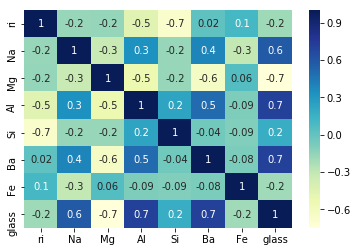

In [71]:
import seaborn as sb
# help(sb.heatmap)

df = df.drop(['K', 'Ca'], axis=1)
x_cols.remove('K')
x_cols.remove('Ca')
print(df.head())

sb.heatmap(df.corr(), annot=True,fmt=".1g",cmap='YlGnBu')

In [72]:
# plt.plot(df['ri'], df['glass'], linestyle='None', marker='o', color='r')
# plt.plot(df['Ba'], df['glass'], linestyle='None', marker='o', color='g')
# plt.plot(df['Al'], df['glass'], linestyle='None', marker='o', color='b')
# plt.legend(("Ri", "Ba", "Al"))
# plt.show()

# plt.plot(df['glass'], linestyle='None', marker='o')

In [73]:
df_1 = df[df['glass'] == 1]
df_2 = df[df['glass'] == 2]
df_7 = df[df['glass'] == 7]

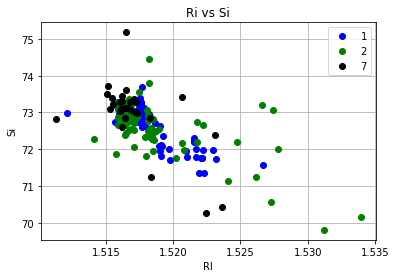

In [74]:
plt.plot(df_1['ri'], df_1['Si'], linestyle="None", marker='o', color='blue')
plt.plot(df_2['ri'], df_2['Si'], linestyle="None", marker='o', color='g')
plt.plot(df_7['ri'], df_7['Si'], linestyle="None", marker='o', color='black')
plt.grid()
plt.xlabel("RI")
plt.ylabel("Si")
plt.title("Ri vs Si")
plt.legend(("1", "2", '7'))

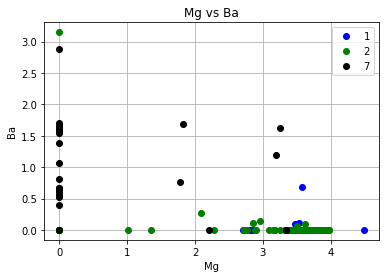

In [75]:
plt.plot(df_1['Mg'], df_1['Ba'], linestyle="None", marker='o', color='blue')
plt.plot(df_2['Mg'], df_2['Ba'], linestyle="None", marker='o', color='g')
plt.plot(df_7['Mg'], df_7['Ba'], linestyle="None", marker='o', color='black')
plt.grid()
plt.xlabel("Mg")
plt.ylabel("Ba")
plt.title("Mg vs Ba")
plt.legend(("1", "2", '7'))

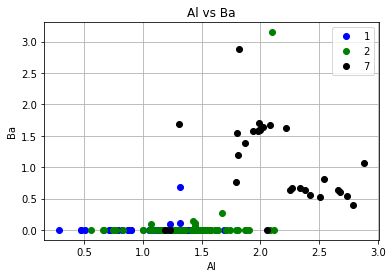

In [76]:
plt.plot(df_1['Al'], df_1['Ba'], linestyle="None", marker='o', color='blue')
plt.plot(df_2['Al'], df_2['Ba'], linestyle="None", marker='o', color='g')
plt.plot(df_7['Al'], df_7['Ba'], linestyle="None", marker='o', color='black')
plt.grid()
plt.xlabel("Al")
plt.ylabel("Ba")
plt.title("Al vs Ba")
plt.legend(("1", "2", '7'))

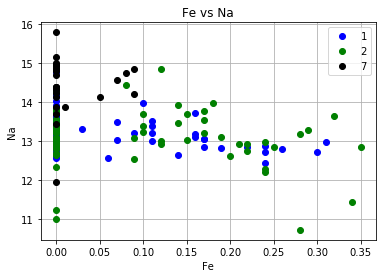

In [77]:
plt.plot(df_1['Fe'], df_1['Na'], linestyle="None", marker='o', color='blue')
plt.plot(df_2['Fe'], df_2['Na'], linestyle="None", marker='o', color='g')
plt.plot(df_7['Fe'], df_7['Na'], linestyle="None", marker='o', color='black')
plt.grid()
plt.xlabel("Fe")
plt.ylabel("Na")
plt.title("Fe vs Na")
plt.legend(("1", "2", '7'))

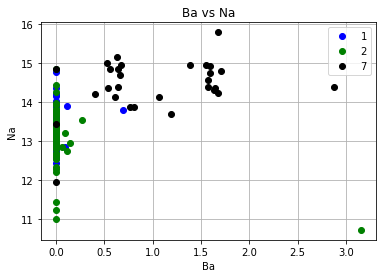

In [78]:
plt.plot(df_1['Ba'], df_1['Na'], linestyle="None", marker='o', color='blue')
plt.plot(df_2['Ba'], df_2['Na'], linestyle="None", marker='o', color='g')
plt.plot(df_7['Ba'], df_7['Na'], linestyle="None", marker='o', color='black')
plt.grid()
plt.xlabel("Ba")
plt.ylabel("Na")
plt.title("Ba vs Na")
plt.legend(("1", "2", '7'))

In [79]:
X_train = pd.concat([df[x_cols].iloc[:50], df[x_cols].iloc[70:130], df[x_cols].iloc[146:166]])
X_test = pd.concat([df[x_cols].iloc[50:70], df[x_cols].iloc[130:146],  df[x_cols].iloc[166:]])
Y_train = pd.concat([df['glass'].iloc[:50], df['glass'].iloc[70:130], df['glass'].iloc[146:166]])
Y_test = pd.concat([df['glass'].iloc[50:70], df['glass'].iloc[130:146],  df['glass'].iloc[166:]])

In [80]:
classifier = svm.SVC(kernel='poly', degree=3)
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Lets run the classifier

In [81]:
model = classifier.fit(X_train, Y_train)
obtained_Y = model.predict(X_test)

### Lets check the Metrics

In [82]:
print(metrics.classification_report(Y_test, obtained_Y))

             precision    recall  f1-score   support

          1       0.74      0.70      0.72        20
          2       0.69      0.69      0.69        16
          7       0.90      1.00      0.95         9

avg / total       0.75      0.76      0.75        45



In [83]:
metrics.confusion_matrix(Y_test, obtained_Y)

array([[14,  5,  1],
       [ 5, 11,  0],
       [ 0,  0,  9]], dtype=int64)

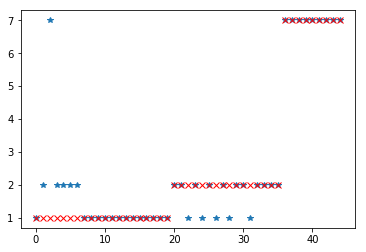

In [84]:
plt.plot(obtained_Y, marker='*', linestyle='None')
plt.plot(Y_test.values.reshape((1, len(Y_test)))[0], marker='x', linestyle='None', color='r')

## Which features gave the best output?

## How can you improve the output here?

## Plot the SVM for the 2 best features!